<a href="https://colab.research.google.com/github/Irodaaa/gpt-4-/blob/main/Tashkent_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
import shutil
import glob
import cv2
import imghdr

In [65]:
data = pd.read_csv("uylar.csv")

In [66]:
data.head()

,lat,lng,district,rooms,size,level,max_levels,price
0,41.371471,69.281049,Yunusobod,3,57.0,4,4,52000
1,41.291115,69.261104,Yakkasaroy,2,52.0,4,5,56000
2,41.280784,69.223683,Chilonzor,2,42.0,4,4,37000
3,41.290163,69.196862,Chilonzor,3,65.0,1,4,49500
4,41.300156,69.210831,Chilonzor,3,70.0,3,5,55000


In [67]:
data.district.value_counts()

Chilonzor        1629
Mirzo Ulugbek    1360
Yunusobod         873
Uchtepa           870
Mirobod           767
Yakkasaroy        647
Yashnobod         459
Shayhontohur      371
Olmzor            264
Sergeli           159
Yangihayot         14
Bektemir            8
Name: district, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
from sklearn.preprocessing import LabelEncoder

# Создайте экземпляр LabelEncoder
label_encoder = LabelEncoder()

# Примените кодирование меток к столбцу "district"
numerical_districts = label_encoder.fit_transform(data['district'])

In [70]:
import pandas as pd

data['district'] = numerical_districts

In [71]:
X = data.drop(["price"], axis=1)
Y = data["price"]

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lat         7421 non-null   float64
 1   lng         7421 non-null   float64
 2   district    7421 non-null   int64  
 3   rooms       7421 non-null   int64  
 4   size        7421 non-null   float64
 5   level       7421 non-null   int64  
 6   max_levels  7421 non-null   int64  
 7   price       7421 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 463.9 KB


In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [74]:
train_data = X_train.join(Y_train)

array([[<Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lng'}>,
        <Axes: title={'center': 'district'}>],
       [<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'level'}>],
       [<Axes: title={'center': 'max_levels'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

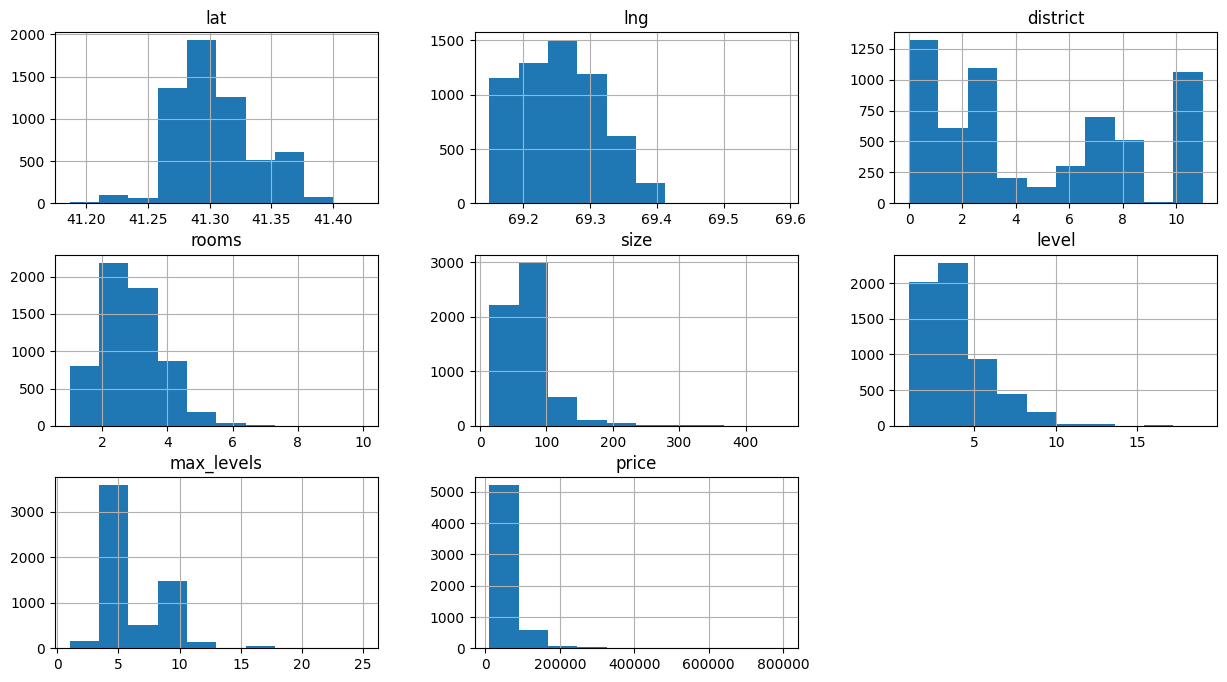

In [75]:
train_data.hist(figsize=(15,8))

In [76]:
train_data.corr()

,lat,lng,district,rooms,size,level,max_levels,price
lat,1.000000,0.530924,0.327724,0.011466,0.026159,-0.024130,-0.060529,0.011453
lng,0.530924,1.000000,0.173453,0.012610,0.060773,0.036886,0.028091,0.062886
district,0.327724,0.173453,1.000000,0.038000,0.028241,0.013083,0.036772,-0.015945
rooms,0.011466,0.012610,0.038000,1.000000,0.793656,0.137446,0.184739,0.534212
size,0.026159,0.060773,0.028241,0.793656,1.000000,0.155457,0.281481,0.770703
level,-0.024130,0.036886,0.013083,0.137446,0.155457,1.000000,0.596812,0.056425
max_levels,-0.060529,0.028091,0.036772,0.184739,0.281481,0.596812,1.000000,0.220975
price,0.011453,0.062886,-0.015945,0.534212,0.770703,0.056425,0.220975,1.000000


In [77]:
data.head()

,lat,lng,district,rooms,size,level,max_levels,price
0,41.371471,69.281049,11,3,57.0,4,4,52000
1,41.291115,69.261104,8,2,52.0,4,5,56000
2,41.280784,69.223683,1,2,42.0,4,4,37000
3,41.290163,69.196862,1,3,65.0,1,4,49500
4,41.300156,69.210831,1,3,70.0,3,5,55000


In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [92]:
scaler= StandardScaler()
X_train, Y_train = train_data.drop(["price"], axis=1), train_data["price"]
X_train_s = scaler.fit_transform(X_train)
reg = LinearRegression()

reg.fit(X_train_s, Y_train)

LinearRegression()

In [80]:
test_data = X_test.join(Y_test)

In [81]:
test_data

,lat,lng,district,rooms,size,level,max_levels,price
1165,41.297892,69.180471,7,4,105.0,8,9,55000
2161,41.281856,69.255267,8,2,59.0,1,2,33500
1347,41.262123,69.164767,1,4,105.0,8,9,50000
1712,41.271054,69.210189,1,3,65.0,1,4,46500
255,41.322142,69.303611,3,3,70.0,5,5,46500
...,...,...,...,...,...,...,...,...
6163,41.364536,69.228153,4,2,52.0,1,4,52500
1837,41.296252,69.190901,7,3,78.0,2,4,56000
4395,41.274633,69.200587,1,2,57.0,8,9,35000
741,41.286793,69.178981,7,4,80.0,1,5,55000


In [93]:
X_test_s = scaler.transform(X_test)

In [95]:
reg.score(X_test_s, Y_test)

0.6718823025513623

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
forest = RandomForestRegressor()

In [99]:
forest.fit(X_train_s,Y_train)

forest.score(X_test_s,Y_test)

0.6800654530933818

In [100]:
from sklearn.model_selection import GridSearchCV

In [112]:
param_grid = {
    "n_estimators": [30,50,100],
    "max_features":[2,4,6,8],
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [113]:
best_forest =grid_search.best_estimator_

In [114]:
best_forest.score(X_test_s, Y_test)

0.8272813238617609